In [1]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import os
import numpy as np

In [2]:
def make_binary_from_multiclass(data, labels, interesting_class_0, interesting_class_1):
    binary_data = []
    binary_labels = []
    for i in range(labels.shape[0]):
        if labels[i] == interesting_class_0:
            binary_labels.append(0)
            binary_data.append(data[i])
        elif labels[i] == interesting_class_1:
            binary_labels.append(1)
            binary_data.append(data[i])
    binary_labels = np.array(binary_labels)
    binary_data = np.array(binary_data)
    return binary_data, binary_labels

In [3]:
# function for making imbalanced dataset from a binary one
def make_imbalanced_dataset(data, labels, proportion, label_to_cut=-1, random_state=0):
    # fix the random seed
    np.random.seed(random_state)
    # download input data and labels into the DataFrame
    dataset = pd.DataFrame(data)
    dataset['label'] = labels
    # get unique labels (class "names")
    unique_labels = np.sort(dataset.label.unique())
    num_labels = []
    # get number of examples for each class
    for label in unique_labels:
        num_labels.append(dataset.loc[dataset['label'] == label].shape[0])
    # get the label of class which will be imbalanced
    if label_to_cut == -1:
        label_to_cut = num_labels.index(min(num_labels))
    # count number of examples after make it imbalanced
    num_imbalanced_label = int(round(proportion * (sum(num_labels) - num_labels[label_to_cut]) / (1 - proportion), 0))
    # 
    inds_set = {int(dataset.loc[dataset['label'] == label_to_cut].shape[0] * np.random.random())}
    while len(inds_set) < num_imbalanced_label:
        inds_set.add(int(dataset.loc[dataset['label'] == label_to_cut].shape[0] * np.random.random()))
    inds_list = list(inds_set)
    class_to_cut = dataset.loc[dataset['label'] == label_to_cut]
    imbalanced_dataset = class_to_cut.iloc[inds_list]
    for label in unique_labels:
        if label != label_to_cut:
            imbalanced_dataset = imbalanced_dataset.append(dataset.loc[dataset['label'] == label])
    imbalanced_dataset = imbalanced_dataset.sample(frac=1, random_state=random_state) 
    return imbalanced_dataset

In [4]:
try:
    os.mkdir('imbalanced_datasets')
except:
    pass

try:
    os.mkdir('binary_datasets')
except:
    pass

### Breast Cancer

In [5]:
# Make imbalanced breast cancer
bc = datasets.load_breast_cancer()
imbalanced_cancer = make_imbalanced_dataset(bc.data, bc.target, 0.1, 1)
columns =bc.feature_names
columns = np.append(columns, 'label')
imbalanced_cancer.columns = columns
imbalanced_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
321,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,0.1928,0.05096,...,23.03,150.20,1657.0,0.10540,0.1537,0.2606,0.14250,0.3055,0.05933,0
255,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,...,22.07,108.10,826.0,0.15120,0.3262,0.3209,0.13740,0.3068,0.07957,0
146,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,0.07371,...,26.38,91.93,591.7,0.13850,0.4092,0.4504,0.18650,0.5774,0.10300,0
167,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,0.1893,0.05534,...,26.30,130.70,1260.0,0.11680,0.2119,0.2318,0.14740,0.2810,0.07228,0
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,24.70,129.10,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558,0


In [6]:
print "Number of type 0:", imbalanced_cancer.loc[imbalanced_cancer['label'] == 0].shape[0]
print "Number of type 1:", imbalanced_cancer.loc[imbalanced_cancer['label'] == 1].shape[0]

Number of type 0: 212
Number of type 1: 24


In [7]:
# save to .csv
imbalanced_cancer.to_csv('./imbalanced_datasets/imbalanced_breast_cancer.csv', index=False)
check_df = pd.read_csv('./imbalanced_datasets/imbalanced_breast_cancer.csv')
check_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,0.1928,0.05096,...,23.03,150.20,1657.0,0.10540,0.1537,0.2606,0.14250,0.3055,0.05933,0
1,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,...,22.07,108.10,826.0,0.15120,0.3262,0.3209,0.13740,0.3068,0.07957,0
2,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,0.07371,...,26.38,91.93,591.7,0.13850,0.4092,0.4504,0.18650,0.5774,0.10300,0
3,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,0.1893,0.05534,...,26.30,130.70,1260.0,0.11680,0.2119,0.2318,0.14740,0.2810,0.07228,0
4,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,24.70,129.10,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558,0


### Iris

In [8]:
# load iris dataset
iris = datasets.load_iris()
# make binary iris
iris_data_binary, iris_target_binary = make_binary_from_multiclass(iris.data, iris.target, 1, 2)
iris01 = pd.DataFrame(iris_data_binary)
iris01['label'] = iris_target_binary
# make imbalanced binary iris
imbalanced_iris01 = make_imbalanced_dataset(iris_data_binary, iris_target_binary, 0.1, 1)

In [9]:
print "Binary iris:"
print "Number of type 0:", iris01.loc[iris01['label'] == 0].shape[0]
print "Number of type 1:", iris01.loc[iris01['label'] == 1].shape[0]

Binary iris:
Number of type 0: 50
Number of type 1: 50


In [10]:
print "Binary imbalanced iris:"
print "Number of type 0:", imbalanced_iris01.loc[iris01['label'] == 0].shape[0]
print "Number of type 1:", imbalanced_iris01.loc[iris01['label'] == 1].shape[0]

Binary imbalanced iris:
Number of type 0: 50
Number of type 1: 6


In [11]:
# save both balanced and imbalanced binary iris datasets to csv
iris01.to_csv('./binary_datasets/iris01.csv', index=False)
imbalanced_iris01.to_csv('./imbalanced_datasets/imbalanced_iris01.csv', index=False)
check_df = pd.read_csv('./imbalanced_datasets/imbalanced_iris01.csv')
check_df.head()

,0,1,2,3,label
0,5.5,2.5,4.0,1.3,0
1,6.7,3.0,5.0,1.7,0
2,5.4,3.0,4.5,1.5,0
3,5.9,3.2,4.8,1.8,0
4,5.7,2.8,4.5,1.3,0


### Wine

In [12]:
# load wine
wine = datasets.load_wine()
# make binary wine
wine_data_binary, wine_target_binary = make_binary_from_multiclass(wine.data, wine.target, 0, 1)
wine01 = pd.DataFrame(wine_data_binary)
wine01['label'] = wine_target_binary
# make imbalanced binary wine
imbalanced_wine01 = make_imbalanced_dataset(wine_data_binary, wine_target_binary, 0.1, 1)

In [13]:
print "Binary wine:"
print "Number of type 0:", wine01.loc[wine01['label'] == 0].shape[0]
print "Number of type 1:", wine01.loc[wine01['label'] == 1].shape[0]

Binary wine:
Number of type 0: 59
Number of type 1: 71


In [14]:
print "Binary wine:"
print "Number of type 0:", imbalanced_wine01.loc[imbalanced_wine01['label'] == 0].shape[0]
print "Number of type 1:", imbalanced_wine01.loc[imbalanced_wine01['label'] == 1].shape[0]

Binary wine:
Number of type 0: 59
Number of type 1: 7


In [15]:
wine01.to_csv('./binary_datasets/wine01.csv', index=False)
imbalanced_wine01.to_csv('./imbalanced_datasets/imbalanced_wine01.csv', index=False)
check_df = pd.read_csv('./imbalanced_datasets/imbalanced_wine01.csv')
check_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0
1,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,0
2,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0,0
3,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0,0
4,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0,0


### Yeast

In [16]:
yeast = pd.read_csv('./UCI_datasets/yeast.csv', header=None)
yeast.head()

,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [17]:
yeast_data = yeast.iloc[:, 1:-1]
yeast_labels = yeast.iloc[:, -1]

In [18]:
binary_yeast_data, binary_yeast_target = make_binary_from_multiclass(np.array(yeast_data), np.array(yeast_labels), 'NUC', 'CYT')
yeast_CYT_NUC = pd.DataFrame(binary_yeast_data)
yeast_CYT_NUC['label'] = binary_yeast_target
imbalanced_yeast_CYT_NUC = make_imbalanced_dataset(binary_yeast_data, binary_yeast_target, 0.1, 1)

In [19]:
print "Binary yeast:"
print "Number of type NUC(0):", yeast_CYT_NUC.loc[yeast_CYT_NUC['label'] == 0].shape[0]
print "Number of type CYT(1):", yeast_CYT_NUC.loc[yeast_CYT_NUC['label'] == 1].shape[0]

Binary yeast:
Number of type NUC(0): 429
Number of type CYT(1): 463


In [20]:
print "Binary yeast:"
print "Number of type NUC(0):", imbalanced_yeast_CYT_NUC.loc[yeast_CYT_NUC['label'] == 0].shape[0]
print "Number of type CYT(1):", imbalanced_yeast_CYT_NUC.loc[yeast_CYT_NUC['label'] == 1].shape[0]

Binary yeast:
Number of type NUC(0): 429
Number of type CYT(1): 48


In [21]:
yeast_CYT_NUC.to_csv('./binary_datasets/yeastCYTNUC.csv', index=False)
imbalanced_yeast_CYT_NUC.to_csv('./imbalanced_datasets/imbalanced_yeastCYTNUC.csv', index=False)

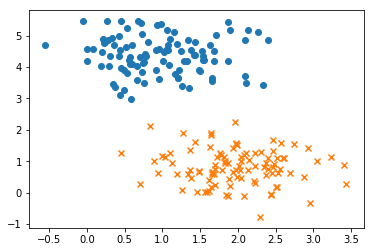

In [22]:
X, y = datasets.make_blobs(n_features=2, n_samples=200, centers=2, cluster_std=0.6 , random_state=0)
blobs = pd.DataFrame(X)
blobs.columns = ['x1', 'x2']
blobs['label'] = y
blobs.head()

label_0 = blobs.loc[blobs['label'] == 0]
label_1 = blobs.loc[blobs['label'] == 1]
plt.scatter(label_0.x1, label_0.x2, marker='o')
plt.scatter(label_1.x1, label_1.x2, marker='x')

(11, 3)


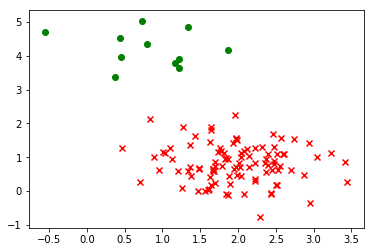

In [23]:
imbalanced_blobs = make_imbalanced_dataset(X, y, 0.1)
imbalanced_blobs.columns = ['x1', 'x2', 'label']
label_0 = imbalanced_blobs.loc[imbalanced_blobs['label'] == 0]
print label_0.shape
label_1 = imbalanced_blobs.loc[imbalanced_blobs['label'] == 1]
plt.scatter(label_0.x1, label_0.x2, marker='o', color='green')
plt.scatter(label_1.x1, label_1.x2, marker='x', color='red')
imbalanced_blobs.to_csv('./imbalanced_datasets/imbalanced_blobs.csv', index=False)